<div class="alert alert-block alert-success">
<b>Hands on Demo by Praveen Vasari. </b>
<h3>Aim of this demo is to present you an over-view on building a "Machine Learning Model", the further continued demos
will answer many of your questions raised out of this demo/discussion.</h3>
</div>

<div class="alert alert-block alert-warning">
<b>In this demo, and in further continued demos I am going to use a "Housing price" dataset.</b>
</div>

<div class="alert alert-block alert-danger">
**Problem Definition:**
<br><br>
<b>This dataset contains many features (columns/attributes/variables - Independent Variables), one of them is target variable (Dependent Variable) **"SalePrice"**.
And, this dataset contains many observations (rows/records/examples). For each and every observation(row), there is an associated "SalePrice" value. </b>

<div class="alert alert-block alert-warning">
An "observation / row" in a dataset = Set of Independent Variables + (Usually) One Dependent Variable
</div>
<br><br>
**Our goal is to - use Machine Learning techniques, and predict a reasonable (close to reality) SalePrice value for a  given new observation ( Note that we are predicting a SalePrice value for this new row/record/observation. Obviously, we will not know the "SalePrice" value for a new observation upfront right?, a domain expert can guess/estimate it, else we may have to take help of ML or Statistical Modeling to guess/predict a SalePrice Value).** 

<div class="alert alert-block alert-warning">
A new given observation = Set of Independent Variables + No Dependent Variable (this is what we have to guess / predict)
</div>

</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
h_data = pd.read_csv("~/Desktop/MyModels/housing_price.csv") # load the dataset to panda's DataFrame

<div class="alert alert-block alert-warning">
<h2>Get to know some primary info about data</h2> 
</div> 

In [3]:
print (h_data.shape)  #(1460, 81) i.e 1460 (including header ?) Rows and 81 Columns.
print (h_data.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [4]:
h_data.describe() #Are you able to receive any thing useful from this output ? 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
h_data.head() #.head(n) -- shows "n" number of (top?)observations from data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
h_data.info() #Are you able to figure out different type of data types on this output?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Let's check how every attribute is - 1). reated with other attribute  2).contributing towards predicting a target value. (Hint: refer Correlation concept)

#### (Optional, you may check this correlation concept later) 

In [18]:
h_data.corr().head(10) #What is mean by "Negative sign here?
#What can be max or min value when we measure correlation?"

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Going through above correlation matrix is tideous, right? Let's visualize it through a heatmap

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

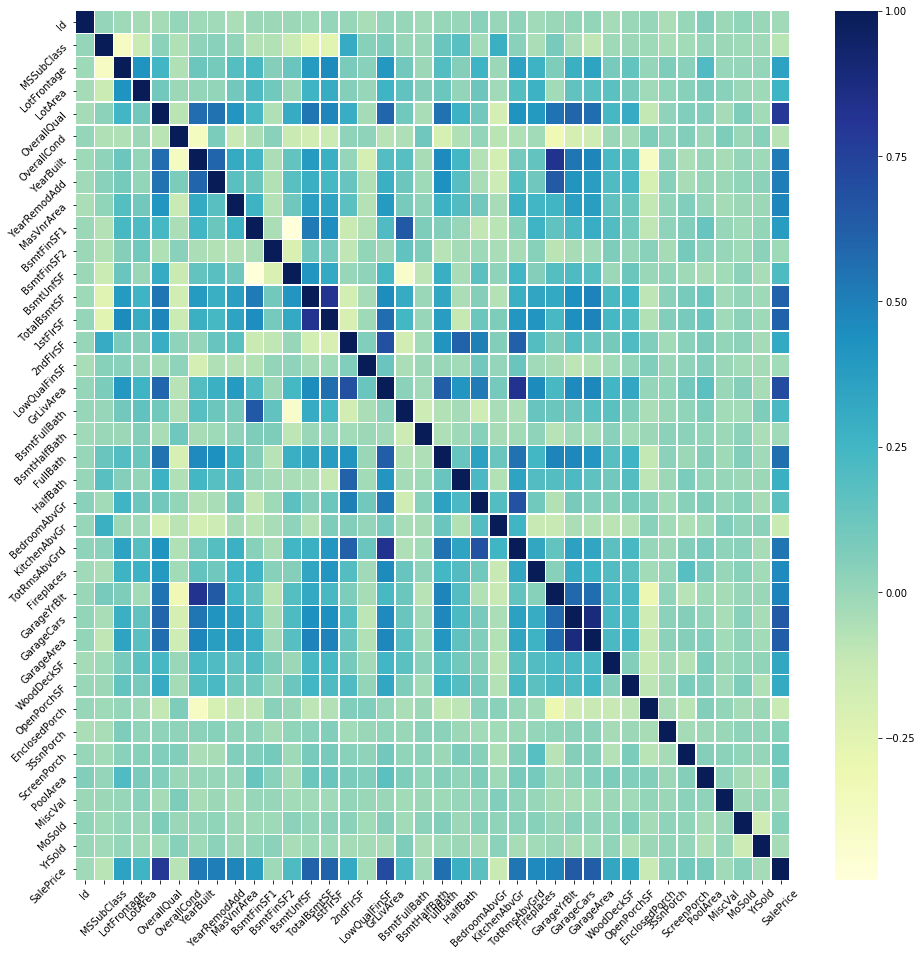

In [16]:
plt.figure(figsize=(16,16))
sns.set_palette("PuBuGn_d")
hmp = sns.heatmap(h_data.corr(), linewidths=.5, cmap="YlGnBu")
lst1 = hmp.set_yticklabels(hmp.get_yticklabels(), rotation = 45)
lst2 = hmp.set_xticklabels(hmp.get_xticklabels(), rotation = 45)

<div class="alert alert-block alert-warning">
<h2>Split the dataset into TrainSet (80%) & TestSet (20%)</h2> 
<b> The primary purpose of splitting the dataset into training and test sets is to 
verify how well would our model perform on unseen data, 
train the model on training set and verify its performance on the test set.

Usually over a given dataset, 60-80% representative split of data is good for training.
The rest of 40-20% should be used as test dataset. </b>
</div> 


#### What is the ideal way to split the data -- random? or in a certain order ? or some other way(s)?

In [7]:
from sklearn.model_selection import train_test_split 
"""
The primary purpose of splitting the dataset into training and test sets is to 
verify how well would our model perform on unseen data, 
train the model on training set and verify its performance on the test set.

Usually over a given dataset, 60-80% representative split of data is good for training.
The rest of 40-20% should be used as test dataset.
"""

'\nThe primary purpose of splitting the dataset into training and test sets is to \nverify how well would our model perform on unseen data, \ntrain the model on training set and verify its performance on the test set.\n\nUsually over a given dataset, 60-80% representative split of data is good for training.\nThe rest of 40-20% should be used as test dataset.\n'

In [8]:
X = h_data.drop(['SalePrice','Id'],axis=1) #Take all features (independent variables) to "X" variable i.e panda's dataframe
#X.columns,X.shape
y = h_data.SalePrice #Take target variable (dependent varaiable) to "y" variable i.e panda's series

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22) #splits train set - 80%, #test set - 20%

In [10]:
X_train.shape #;y_train.shape;X_test.shape;y_test.shape

(1168, 79)

### Check whether we are able to build a primary model at this stage ?

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
hlm = LinearRegression()
hlm.fit(X_train,y_train) # Fails since the data set has categorical & null values, this is not expected by
#LinearRegression algorithm/model, ofcourse few other algorithms/models also would fail

ValueError: could not convert string to float: 'Abnorml'

In [13]:
from sklearn.tree import DecisionTreeRegressor 
htr = DecisionTreeRegressor()
htr.fit(X_train,y_train)

ValueError: could not convert string to float: 'Abnorml'

In [14]:
from sklearn.svm import SVR 
h_svr = SVR()
h_svr.fit(X_train,y_train)

ValueError: could not convert string to float: 'Abnorml'


<div class="alert alert-block alert-info">
<b>As you see above, look at why each of those models is failing to fit, i.e throwing errors (not able to accept train data for learning). 
(Remember, most of the machine learning algorithms fail (throw errors) if there are any categorial values or nulls present in training/input data). Hence let's at least prepre the data such a way that the data wont contain any categorical values. (either you can drop the categorical features, else you can transform the categorical data to numerical using appropriate techniques)</b> 
</div>

<div class="alert alert-block alert-warning">
<h2>Data Preparation</h2> 
</div>

### How many columns / features have "null" values

In [15]:
nu_featurs = X_train.isnull().any(axis=0)
nu_lst_ftrs = [x for x in nu_featurs.index if nu_featurs[x]]
print (len(nu_lst_ftrs))
print (nu_lst_ftrs)

19
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


### How many features belong to categorial datatype

In [16]:
cat_features = X_train.select_dtypes(include=['object']).columns
print (len(cat_features))
print (cat_features)

43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### How many categorical features have "null" values - any way we are going to drop all categorical features, need not to check this

In [17]:
ncat_features = X_train.select_dtypes(include=['object']).isnull().any(axis=0)

temp_list = []
for feature in ncat_features.index:
    if nu_featurs[feature]:
        temp_list.append(feature)
        print (feature)

print (len(temp_list))

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
16



<div class="alert alert-block alert-warning">
<b>Drop all categorial features in the train data</b> 
</div>

<div class="alert alert-block alert-info">
<b>Later,We may revist to this step just to make sure we are not dropping out any valuabe categorial feature from model.
In case we are considering any categorical feature to keep, we have to convert it to numerical labels.

Find out what are the techniques will help us to convert a categorical feature to numerical feature.</b> 
</div>

In [19]:
def getCatFeatures(df):
    cat_features = df.select_dtypes(include=['object']).columns 
    return cat_features

def dropFeatures(df, lst_featrues):
    for feature in lst_featrues:
            print('Droping --- {}'.format(feature))
            df.drop(feature, axis=1, inplace=True) 
    return df

In [19]:
cless_X_train = dropFeatures(X_train,getCatFeatures(X_train))

Droping --- MSZoning
Droping --- Street
Droping --- Alley
Droping --- LotShape
Droping --- LandContour
Droping --- Utilities
Droping --- LotConfig
Droping --- LandSlope
Droping --- Neighborhood
Droping --- Condition1
Droping --- Condition2
Droping --- BldgType
Droping --- HouseStyle
Droping --- RoofStyle
Droping --- RoofMatl
Droping --- Exterior1st
Droping --- Exterior2nd
Droping --- MasVnrType
Droping --- ExterQual
Droping --- ExterCond
Droping --- Foundation
Droping --- BsmtQual
Droping --- BsmtCond
Droping --- BsmtExposure
Droping --- BsmtFinType1
Droping --- BsmtFinType2
Droping --- Heating
Droping --- HeatingQC
Droping --- CentralAir
Droping --- Electrical
Droping --- KitchenQual
Droping --- Functional
Droping --- FireplaceQu
Droping --- GarageType
Droping --- GarageFinish
Droping --- GarageQual
Droping --- GarageCond
Droping --- PavedDrive
Droping --- PoolQC
Droping --- Fence
Droping --- MiscFeature
Droping --- SaleType
Droping --- SaleCondition


In [20]:
still_cat_features = cless_X_train.select_dtypes(include=['object']).columns
print (len(still_cat_features))

0


In [21]:
cless_X_train.shape

(1168, 36)

In [22]:
cless_hlm = LinearRegression()
cless_hlm.fit(cless_X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
cless_htr = DecisionTreeRegressor()
cless_htr.fit(cless_X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [24]:
cless_h_svr = SVR()
cless_h_svr.fit(cless_X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<div class="alert alert-block alert-warning">
<h3>Again, check why each of above 3 models is failing (throwing errors), are those errors same as earlier ?</h3> 
</div>

<div class="alert alert-block alert-info">
<b>Notice that, after dropping (removing) all categorical features, we tried to fit the models above, but they failed since there are some null values in data. As we know this is not expected by most of ML models.</b> 
</div>

<div class="alert alert-block alert-warning">
<h3>Check how many features have "null" values and what are they ? -- 1). Do we have to delete all the features/columns which have nulls ?   or 2). Do we have to delete all the observations (records/rows) which have nulls ? or 3).Do we have to fill-up those "null"s with some appropriate values ?   -- Take a reasonable call</h3> 
</div>


In [25]:
nu_featurs = cless_X_train.isnull().any(axis=0)

temp_list = []

for feature in nu_featurs.index:
    if nu_featurs[feature]:
        temp_list.append(feature)
        print (feature)

print (len(temp_list))
# we can use this statement too 
#[x for x in nu_featurs.index if nu_featurs[x]]

LotFrontage
MasVnrArea
GarageYrBlt
3


### For now, I wanted to impute the nulls suach a way that all the nulls are replaced by their respective mean values

### Impute the missing values using "imputer"

check what are the other ways we have to perform imputation

In [26]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(cless_X_train) # What is the meaning of "fit" here, are we building any model here ?
ncless_X_train= imp.transform(cless_X_train)

In [27]:
type(ncless_X_train)

numpy.ndarray

In [28]:
#pd.notna(ncless_X_train)
np.isnan(ncless_X_train).any() #Are there any Null's in given ndarray ? -- If yes, return TRUE. If not, return FALSE.

False

In [29]:
ncless_X_train.shape

(1168, 36)

<div class="alert alert-block alert-success">
<h2>Linear Regression Model</h2>
</div>

In [30]:
from sklearn.linear_model import LinearRegression
nc_lnr = LinearRegression()
nc_lnr.fit(ncless_X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Good that this time, model did fit with out any error

In [31]:
print ('Co-efficients: ' ,nc_lnr.coef_)
print ('Intercept:' ,nc_lnr.intercept_)
#print (nc_lnr.get_params()) -- model's default hyper parameters 

Co-efficients:  [-1.94944960e+02 -7.64465608e+01  4.18194591e-01  1.81416463e+04
  4.40480777e+03  2.96853129e+02  1.48619871e+02  3.37856857e+01
  8.91586280e+00 -6.13469104e-01 -2.76223172e-01  8.02617053e+00
  1.82504054e+01  2.07079654e+01 -1.14551111e+01  2.75032597e+01
  1.06217791e+04  4.19600448e+03  3.53163437e+03 -2.13691064e+03
 -1.03707259e+04 -1.15356648e+04  5.39499921e+03  3.30227397e+03
  8.45672666e+01  1.13157239e+04 -5.47764905e+00  2.59425128e+01
 -4.26173056e+00  8.89750691e+00  3.72789438e+01  5.82644744e+01
 -2.14183532e+01 -9.78449337e-01 -2.07231250e+02 -5.30025886e+02]
Intercept: -35404.70315483044


#### Looking at these co-efficients, Can you figure out which are the least contributing features?
Can we remove those features from model? - We will decide it in our up-coming session

In [32]:
list(zip(cless_X_train.columns, nc_lnr.coef_))

[('MSSubClass', -194.9449596681271),
 ('LotFrontage', -76.4465608048302),
 ('LotArea', 0.41819459066477904),
 ('OverallQual', 18141.646314631744),
 ('OverallCond', 4404.80776766004),
 ('YearBuilt', 296.85312941177915),
 ('YearRemodAdd', 148.61987147768065),
 ('MasVnrArea', 33.78568573861331),
 ('BsmtFinSF1', 8.915862796354133),
 ('BsmtFinSF2', -0.6134691039892459),
 ('BsmtUnfSF', -0.27622317249915795),
 ('TotalBsmtSF', 8.026170527779868),
 ('1stFlrSF', 18.250405367864005),
 ('2ndFlrSF', 20.70796542085054),
 ('LowQualFinSF', -11.455111053951086),
 ('GrLivArea', 27.50325973307008),
 ('BsmtFullBath', 10621.779066230682),
 ('BsmtHalfBath', 4196.004480685913),
 ('FullBath', 3531.634368915114),
 ('HalfBath', -2136.910641082251),
 ('BedroomAbvGr', -10370.725947812618),
 ('KitchenAbvGr', -11535.664804473663),
 ('TotRmsAbvGrd', 5394.9992098013145),
 ('Fireplaces', 3302.273974904605),
 ('GarageYrBlt', 84.56726661758395),
 ('GarageCars', 11315.723882319578),
 ('GarageArea', -5.477649045333692),
 

In [33]:
from pandas import Series,DataFrame
coeff = DataFrame(cless_X_train.columns)
coeff['Coefficient Estimate'] = Series(nc_lnr.coef_)
coeff

,0,Coefficient Estimate
0,MSSubClass,-194.944960
1,LotFrontage,-76.446561
2,LotArea,0.418195
3,OverallQual,18141.646315
4,OverallCond,4404.807768
5,YearBuilt,296.853129
6,YearRemodAdd,148.619871
7,MasVnrArea,33.785686
8,BsmtFinSF1,8.915863
9,BsmtFinSF2,-0.613469


<div class="alert alert-block alert-warning">
***Shall we check how our model is performing on "Training Data" ? Let's make predictions on Training data itself.*** 
<br><br>
***Do you think a machine learning model can learn 100% and predict 100% ?  Are there any such models ? If yes, Do we trust such model (s)*** ?
</div>

In [34]:
pred_X_train = nc_lnr.predict(ncless_X_train)

<div class="alert alert-block alert-warning">
***Let's see, how better the model has learnt over training dataset. Let's measure it's performance over training data it self for now.***   
<br>
<b>1). What are the performance measure metrics we have to relay on ? </b>
<br>
<b>2). What is the ideal value of R2 (R Square) metric ?</b>
<br>
<b>3).What RMSE value is ideal ?</b>

</div>

In [35]:
from sklearn.metrics import mean_squared_error, r2_score 
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)

Root Mean Squared Error X Train :  35228.601398497056
R-Squre X Train :  0.8045716237395569


#### What is the meaning of RMSE value 35228.6013 here ? 
#### R2 value (ranges between "0 to 1", can it be negative ?) tells - How much of variability in target variable (y) is explained by model's input (independent) variables (x's)?

### Code for Adj_R2

The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?

That is why, we use “Adjusted R-Square”.

The Adjusted R-Square is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [36]:
def adj_r2_score(model,y,yhat):
        """Adjusted R square — put fitted linear model, y value, estimated y value in order
        
            Example:
            In [142]: metrics.r2_score(diabetes_y_train,yhat)
            Out[142]: 0.51222621477934993
        
            In [144]: adj_r2_score(lm,diabetes_y_train,yhat)
            Out[144]: 0.50035823946984515"""
        from sklearn import metrics
        adj = 1 - float(len(y)-1)/(len(y)-len(model.coef_)-1)*(1 - metrics.r2_score(y,yhat))
        return adj


In [37]:
print ('Adjusted R-Square X Train: ',adj_r2_score(nc_lnr,y_train,pred_X_train))

Adjusted R-Square X Train:  0.7983510918691981


### LET's TEST OUR LINEAR REGRESSION MODEL

In [38]:
X_test.shape

(292, 79)

<div class="alert alert-block alert-info">
<b>What ever the transformations we performed on "Training Set" should be performed on "Test Set" too.</b> 
</div>

<div class="alert alert-block alert-warning">
For our usecase here, we did these transformations over trainig data -- 1). Dropeed the categorical features,  2).Filled-up the null values with respective Mean values using Imputer.transform(TrainData)   (Note that, we already estimated Mean using Imputer.fit(), we MUST use the same estimated mean for test data too .. think Why? )
</dev>

<div class="alert alert-block alert-info">
Usually we have to make use of scikit-learn's Pipleline technique to automate the sequence of several such transformations, so that we can safely relay on that Pipleline to apply it over on Train & Test data. It saves time and volume of code.
</dev>

In [39]:
cless_X_test = dropFeatures(X_test,getCatFeatures(X_test))

Droping --- MSZoning
Droping --- Street
Droping --- Alley
Droping --- LotShape
Droping --- LandContour
Droping --- Utilities
Droping --- LotConfig
Droping --- LandSlope
Droping --- Neighborhood
Droping --- Condition1
Droping --- Condition2
Droping --- BldgType
Droping --- HouseStyle
Droping --- RoofStyle
Droping --- RoofMatl
Droping --- Exterior1st
Droping --- Exterior2nd
Droping --- MasVnrType
Droping --- ExterQual
Droping --- ExterCond
Droping --- Foundation
Droping --- BsmtQual
Droping --- BsmtCond
Droping --- BsmtExposure
Droping --- BsmtFinType1
Droping --- BsmtFinType2
Droping --- Heating
Droping --- HeatingQC
Droping --- CentralAir
Droping --- Electrical
Droping --- KitchenQual
Droping --- Functional
Droping --- FireplaceQu
Droping --- GarageType
Droping --- GarageFinish
Droping --- GarageQual
Droping --- GarageCond
Droping --- PavedDrive
Droping --- PoolQC
Droping --- Fence
Droping --- MiscFeature
Droping --- SaleType
Droping --- SaleCondition


In [40]:
cless_X_test.shape

(292, 36)

In [41]:
nu_featurs = cless_X_test.isnull().any(axis=0)
[x for x in nu_featurs.index if nu_featurs[x]]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [42]:
ncless_X_test= imp.transform(cless_X_test) 
# Why are we not doing .fit here, look above where we already applied imputation
#If you observed, we performed "imp.fit(cless_X_train)" for train set, but we are not performing it over "test set".

In [43]:
np.isnan(ncless_X_test).any()

False

In [44]:
ncless_X_test.shape

(292, 36)

In [45]:
y_test.shape

(292,)

In [46]:
pred_X_test = nc_lnr.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)

Root Mean Squared Error X TEST :  30797.68915361465
R-Squre X TEST :  0.8453155098730738


<div class="alert alert-block alert-warning">
<b>Check the after-training (train set) RMSE value, and compare it with prediction's (test set ) RMSE value. Check the R-Square value as well.</b>
<b>Why there is a difference ?</b> 
</div>


<div class="alert alert-block alert-warning">
<h4>What if you "train & test" this model on another (random) sample of housing price dataset?
Do we see same error or it will change - Why?</h4>
</div>

<div class="alert alert-block alert-info">
<b>Are we satisfied with this Model Evaluation technique (Train/Test split - measure Training error & Testing error)</b> - Check about K-Fold Cross Validation technique
</div>

<div class="alert alert-block alert-info">
<b>It's time to understand the meaning of "Bias & Variance" -- Explore little bit about it.</b> 
</div>


<div class="alert alert-block alert-success">
<h2>Support Vector Regression Model</h2>
</div>

In [47]:
from sklearn.svm import SVR 

In [48]:
h_svr = SVR()

In [49]:
h_svr.fit(ncless_X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
print ("TRAINING METRICS:    \n")
pred_X_train = h_svr.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train, "\n")
#print ('Adjusted R-Square X Train: ',adj_r2_score(h_svr,y_train,pred_X_train))

print ("TESTING METRICS:  \n")
pred_X_test = h_svr.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
#print ('Adjusted R-Square X Train: ',adj_r2_score(h_svr,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  81648.4393031009
R-Squre X Train :  -0.04976622464934599 

TESTING METRICS:  

Root Mean Squared Error X TEST :  80458.54887199096
R-Squre X TEST :  -0.055734948859778255


<div class="alert alert-block alert-warning">

<b>Check the after-training (train set) RMSE value, and compare it with prediction's (test set ) RMSE value, check the R-Square value as well (what is mean by Negative value here ?) </b>

</div>

<div class="alert alert-block alert-warning">
<b>Compare SVR model RMSE & R2 values with LinearRegression Model -- What is your interpretation -- which model is better out of these two ?</b>
</div>

<div class="alert alert-block alert-success">
<h2>DecisionTree Regression Model</h2>
</div>

In [51]:
from sklearn.tree import DecisionTreeRegressor 

In [52]:
h_tr_reg = DecisionTreeRegressor()

In [53]:
h_tr_reg.fit(ncless_X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
print ("TRAINING METRICS:    \n")
pred_X_train = h_tr_reg.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train, "\n")
#print ('Adjusted R-Square X Train: ',adj_r2_score(h_tr_reg,y_train,pred_X_train))

print ("TESTING METRICS:  \n")
pred_X_test = h_tr_reg.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
#print ('Adjusted R-Square X Train: ',adj_r2_score(h_tr_reg,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  171.72822188499134
R-Squre X Train :  0.9999953561287928 

TESTING METRICS:  

Root Mean Squared Error X TEST :  40153.84311107769
R-Squre X TEST :  0.7370551052061677



<div class="alert alert-block alert-warning">

<b>Check the after-training (train set) RMSE value, and compare it with prediction's (test set ) RMSE value, check the R-Square value as well </b>

</div>

<div class="alert alert-block alert-warning">
<b>Compare all the three model's RMSE & R2 values with each other -- What is your interpretation -- which model is better out of these three</b>
</div>


<div class="alert alert-block alert-success">
<h2>SGD Regression (Optimisation)</h2>
</div>

In [55]:
from sklearn.linear_model import SGDRegressor

In [56]:
from sklearn.linear_model import SGDRegressor
#eta0=0.0001, max_iter=1000 , tol=None
sgd_reg = SGDRegressor() 
sgd_reg.fit(ncless_X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [57]:
print ("TRAINING METRICS:    \n")
pred_X_train = sgd_reg.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)
print ('Adjusted R-Square X Train: ',adj_r2_score(sgd_reg,y_train,pred_X_train),"\n")

print ("TESTING METRICS:  \n")
pred_X_test = sgd_reg.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
print ('Adjusted R-Square X Train: ',adj_r2_score(sgd_reg,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  3.7391197302333824e+18
R-Squre X Train :  -2.2015855396064736e+27
Adjusted R-Square X Train:  -2.2716625329095973e+27 

TESTING METRICS:  

Root Mean Squared Error X TEST :  2.8112998145817856e+18
R-Squre X TEST :  -1.288916654928598e+27
Adjusted R-Square X Train:  -1.470881359153812e+27


<div class="alert alert-block alert-success">
<h2> Lasso, Ridge, ElasticNet Regressions (Regularisation -- Needs Hyperparameters)</h2>
<b>Lasso (Least Absolute Shrinkage Selector Operator) - L1 Regularisation, Ridge - L2 Regularisation</b>
</div>
<div class="alert alert-block alert-success">
(Elaborated discussion on "Regularisation" on next demo)
</div>

### Regularisation helps to solve the problem of over-fitting (i.e high variance)
### https://courses.cs.washington.edu/courses/cse416/18sp/slides/L4b_lasso-regression.pdf

In [58]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso_reg = Lasso()


In [59]:
lasso_reg.fit(ncless_X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
print ("TRAINING METRICS:    \n")
pred_X_train = lasso_reg.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)
print ('Adjusted R-Square X Train: ',adj_r2_score(lasso_reg,y_train,pred_X_train),"\n")

print ("TESTING METRICS:  \n")
pred_X_test = lasso_reg.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
print ('Adjusted R-Square X Train: ',adj_r2_score(lasso_reg,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  35228.602914974355
R-Squre X Train :  0.8045716069144381
Adjusted R-Square X Train:  0.7983510745085316 

TESTING METRICS:  

Root Mean Squared Error X TEST :  30797.143573002522
R-Squre X TEST :  0.8453209902914831
Adjusted R-Square X Train:  0.8234839536267513


In [61]:
rig_reg = Ridge()
rig_reg.fit(ncless_X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
print ("TRAINING METRICS:    \n")
pred_X_train = rig_reg.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)
print ('Adjusted R-Square X Train: ',adj_r2_score(rig_reg,y_train,pred_X_train),"\n")

print ("TESTING METRICS:  \n")
pred_X_test = rig_reg.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
print ('Adjusted R-Square X Train: ',adj_r2_score(rig_reg,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  35228.68244537608
R-Squre X Train :  0.8045707245339366
Adjusted R-Square X Train:  0.7983501640416482 

TESTING METRICS:  

Root Mean Squared Error X TEST :  30793.340561731868
R-Squre X TEST :  0.8453591892689847
Adjusted R-Square X Train:  0.8235275454010766


In [63]:
rig_reg1 = Ridge(alpha=0.5,normalize=True)
rig_reg1.fit(ncless_X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [64]:
print ("TRAINING METRICS:    \n")
pred_X_train = rig_reg1.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)
print ('Adjusted R-Square X Train: ',adj_r2_score(rig_reg1,y_train,pred_X_train),"\n")

print ("TESTING METRICS:  \n")
pred_X_test = rig_reg1.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
print ('Adjusted R-Square X Train: ',adj_r2_score(rig_reg1,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  36817.8493337206
R-Squre X Train :  0.7865414020392592
Adjusted R-Square X Train:  0.7797469639078828 

TESTING METRICS:  

Root Mean Squared Error X TEST :  31875.60018120333
R-Squre X TEST :  0.8342981912027327
Adjusted R-Square X Train:  0.810904994666648


In [65]:
elst_net_reg = ElasticNet()
elst_net_reg.fit(ncless_X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
print ("TRAINING METRICS:    \n")
pred_X_train = elst_net_reg.predict(ncless_X_train)
mse_X_train = mean_squared_error(y_train, pred_X_train)
r2_X_train = r2_score(y_train, pred_X_train)
print('Root Mean Squared Error X Train : ', np.sqrt(mse_X_train))
print('R-Squre X Train : ', r2_X_train)
print ('Adjusted R-Square X Train: ',adj_r2_score(elst_net_reg,y_train,pred_X_train),"\n")

print ("TESTING METRICS:  \n")
pred_X_test = elst_net_reg.predict(ncless_X_test)
mse_X_test =  mean_squared_error(y_test, pred_X_test)
r2_X_test = r2_score(y_test, pred_X_test)
print('Root Mean Squared Error X TEST : ', np.sqrt(mse_X_test))
print('R-Squre X TEST : ', r2_X_test)
print ('Adjusted R-Square X Train: ',adj_r2_score(elst_net_reg,y_test,pred_X_test))

TRAINING METRICS:    

Root Mean Squared Error X Train :  36390.406782981954
R-Squre X Train :  0.7914689928284145
Adjusted R-Square X Train:  0.7848314010882049 

TESTING METRICS:  

Root Mean Squared Error X TEST :  31367.082501122495
R-Squre X TEST :  0.8395429660432716
Adjusted R-Square X Train:  0.8168902083082041
